# 1. Análise Exploratória dos dados do TMDb

O que se dizer sobre o sucesso de um filme antes de seu lançamento? Existem certas empresas que encontraram uma fórmula consistente (Disney, Warner)? Considerando que filmes importantes que custam mais de US $ 100 milhões para serem produzidos e ainda correm o risco de fracassar, essa questão é mais importante do que nunca para a indústria. Os aficcionados do cinema podem ter interesses diferentes. Pode-se prever quais filmes serão bem avaliados, sejam eles um sucesso comercial ou não?

Este é um ótimo lugar para começar a investigar essas questões, com dados sobre o enredo, elenco, equipe, orçamento e receitas de vários milhares de filmes. 

Este conjunto de dados contém informações sobre 10.000 filmes coletados do The Movie Database (TMDb), incluindo classificações de usuários e rendimento. 

Questões para explorar

- Quais gêneros são mais populares de ano em ano?
- A popularidade do filme é dependente do seu orçamento (budget)? 


## 1.1. Análise Inicial

In [83]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import seaborn as sns
import numpy as np
import json

In [84]:
df_1 = pd.read_csv("tmdb_5000_movies.csv")
df_2 = pd.read_csv("tmdb_5000_credits.csv")

In [85]:
df_1.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [86]:
df_1.shape

(4803, 20)

In [87]:
df_2.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [88]:
df_2.shape

(4803, 4)

In [89]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [90]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [91]:
df_1.corr() 

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


Em uma breve análise, é possível inferir que, os atributos que mais influenciam o budget (orçamento) é a popularidade do filme e seu rendimento.

O mesmo pode-se dizer sobre a popularidade e o rendimento. Quanto mais o filme é popular maior é seu rendimento.

O contrário também é válido para ambos os casos. 

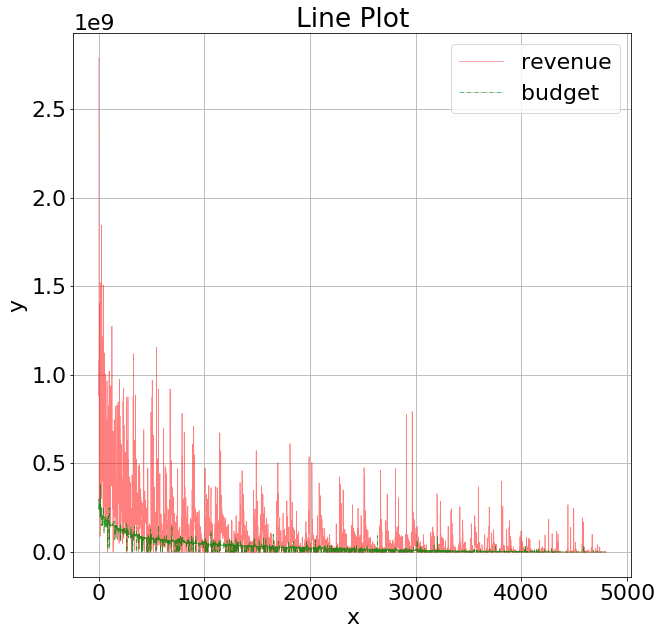

In [92]:
df_1.revenue.plot(kind='line', color='r', label='revenue', linewidth=.7, alpha=.5, grid=True, 
                  linestyle='-',figsize = (10,10) )
df_1.budget.plot(color='g', label='budget', linewidth=.7, alpha=.8, grid=True, linestyle='-.')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Plot')
plt.show()

A partir deste gráfico percebe-se que quanto maior o orçamento, o rendimento tende a ser maior.
Contudo, há alguns casos onde, mesmo o orçamento sendo "pouco", o rendimento ultrapassada a relação de linearidade com o orçamento. Portanto é preciso analisar outros atributos que possam determinar essa correlação.

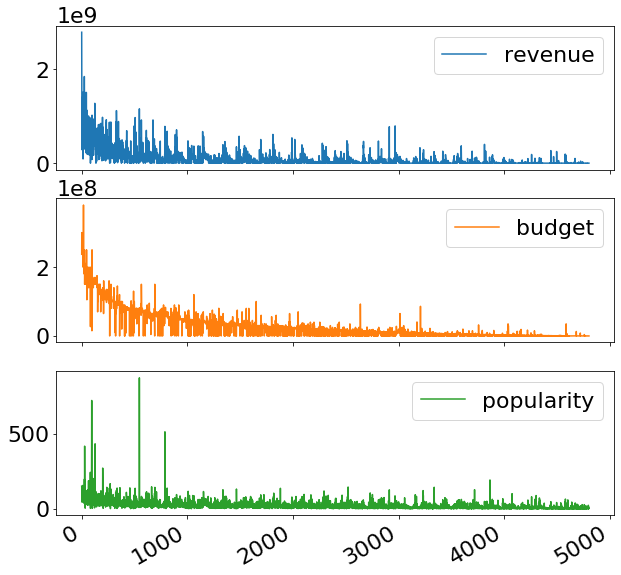

In [93]:
data1.plot(subplots = True, figsize = (10,10))
plt.show()


Outro fator, além do orçamento, que pode determinar o quanto de rendimento um filme pode ter é a popularidade.

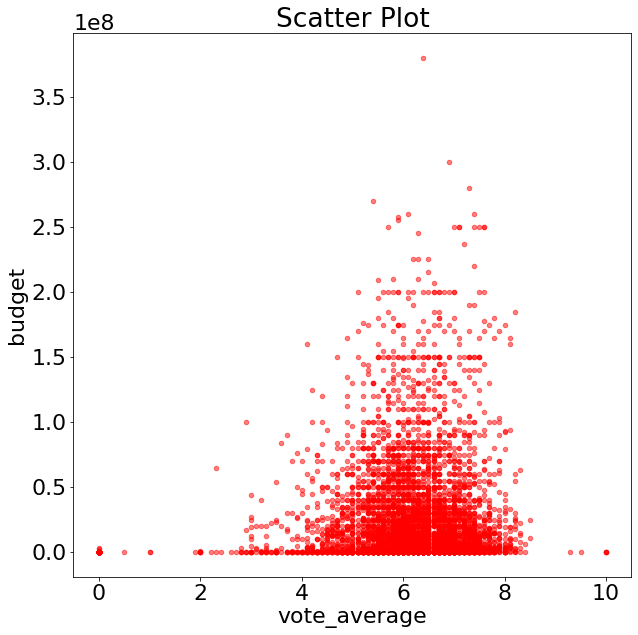

In [94]:
df_1.plot(kind='scatter', x='vote_average', y='budget', alpha=.5, color='r',figsize = (10,10))
plt.xlabel('vote_average')
plt.ylabel('budget')
plt.title('Scatter Plot')
plt.show()


Poderia ser possível que a média de votos seja influenciada pelo orçamento do filme, contudo, como mostra o gráfico de dispersão acima, mesmo quando os filmes têm um orçamento baixo, a média de votos é bastante significante.

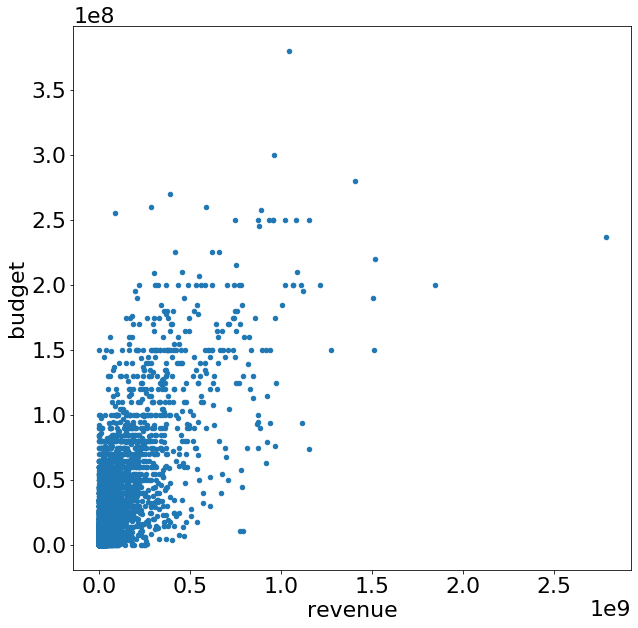

In [95]:
data1.plot(kind = 'scatter', x = 'revenue', y = 'budget',figsize = (10,10))
plt.show()

Como foi dito anteriormente, há uma certa correlação entre o orçamento e o rendimento de um filme, contudo, há exceções, onde mesmo um filme com rendimento baixo tem um orçamento alto e vice-versa.

C:\Users\Rebeca\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:54: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


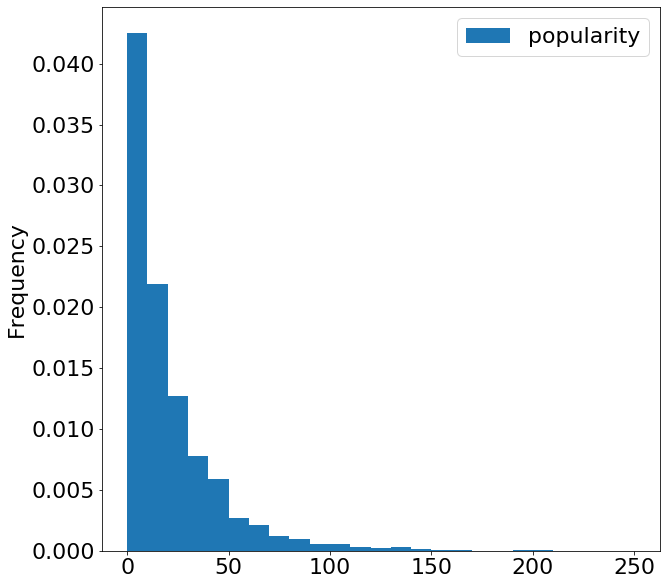

In [96]:
data1.plot(kind = 'hist', y = 'popularity', bins = 25, range = (0,250), normed = True,figsize = (10,10))
plt.show()

Neste dataset, poucos filmes são considerados muito populares, por outro lado, a grande maioria dos filmes são considerados pouco populares.

## 1.2. Outras Análises

Os dados do conjunto de dados podem ser carregados corretamente nos dataframes do pandas, definindo o índice de cada amostra para seu id, usando as funções load_tmdb_credits e load_tmdb_movies.

In [97]:
def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 
                    'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

credits = load_tmdb_credits("tmdb_5000_credits.csv")
movies = load_tmdb_movies("tmdb_5000_movies.csv")

In [98]:
#Para consistência entre os dois dataframes, vamos renomear o campo 'id' no dataframe do filme 
#como 'movie_id'. 
movies.rename(columns={"id": "movie_id"}, inplace=True)

### 1.2.1 Limpeza de Dados

Podemos ver que alguns dos dados em certos campos são muito brutos nos conjuntos de dados de créditos e filmes. A maioria deles contém muitas informações de que não precisamos, então vamos limpá-los um pouco. Primeiro, vamos começar com o conjunto de dados de créditos e ver uma amostra dos campos de elenco e equipe de créditos. 

In [99]:
credits["cast"].iloc[0]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [100]:
credits["crew"].iloc[0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

Seguindo a metodologia descrita aqui (https://www.kaggle.com/sohier/tmdb-format-introduction), podemos substituir o dataframe de créditos por um dataframe de pessoas que exibe o papel desempenhado por atores e membros da equipe em vários filmes em um muito mais limpa e gerenciável. 

In [101]:
credits.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['cast']], axis=1)
credits.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['crew']], axis=1)
credits.apply(lambda row: [person.update({'order': order}) for order, person in enumerate(row['crew'])], axis=1)

cast_list = []
credits["cast"].apply(lambda x: cast_list.extend(x))
cast = pd.DataFrame(cast_list)
cast["type"] = "cast"

crew_list = []
credits["crew"].apply(lambda x: crew_list.extend(x))
crew = pd.DataFrame(crew_list)
crew["type"] = "crew"

people = pd.concat([cast, crew], ignore_index=True, sort=True)
del credits

In [102]:
people.head()

,cast_id,character,credit_id,department,gender,id,job,movie_id,name,order,type
0,242.0,Jake Sully,5602a8a7c3a3685532001c9a,NaN,2,65731,NaN,19995,Sam Worthington,0,cast
1,3.0,Neytiri,52fe48009251416c750ac9cb,NaN,1,8691,NaN,19995,Zoe Saldana,1,cast
2,25.0,Dr. Grace Augustine,52fe48009251416c750aca39,NaN,1,10205,NaN,19995,Sigourney Weaver,2,cast
3,4.0,Col. Quaritch,52fe48009251416c750ac9cf,NaN,2,32747,NaN,19995,Stephen Lang,3,cast
4,5.0,Trudy Chacon,52fe48009251416c750ac9d3,NaN,1,17647,NaN,19995,Michelle Rodriguez,4,cast


Vamos agora passar para o conjunto de dados de filmes. Alguns dos campos dos filmes contêm muitas informações desnecessárias e também podem ser bastante difíceis de ler. Esses campos são as colunas 'genres', 'keywords', 'production_companies', 'production_countries' e 'spoken_languages'. Os dados nesses campos podem ser mais adequados para aparecer em seu próprio dataframe para cada campo, para que possamos discernir melhor quais fatores de um determinado campo aparecem para um determinado filme. Devemos, portanto, criar um dataframe separado para cada um dos campos mencionados acima e removê-los do conjunto de dados de filmes. 

In [103]:
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['genres']], axis=1)
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['keywords']], axis=1)
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['production_companies']], axis=1)
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['production_countries']], axis=1)
movies.apply(lambda row: [x.update({'movie_id': row['movie_id']}) for x in row['spoken_languages']], axis=1)

genres = []
movies["genres"].apply(lambda x: genres.extend(x))
genres = pd.get_dummies(pd.DataFrame(genres).drop("id", axis=1).set_index("movie_id")).sum(level=0)
genres.rename(columns = lambda x: str(x)[5:], inplace=True)

keywords = []
movies["keywords"].apply(lambda x: keywords.extend(x))
keywords = pd.get_dummies(pd.DataFrame(keywords).drop("id", axis=1).set_index("movie_id")).sum(level=0)
keywords.rename(columns = lambda x: str(x)[5:], inplace=True)

production_companies = []
movies["production_companies"].apply(lambda x: production_companies.extend(x))
production_companies = pd.get_dummies(pd.DataFrame(production_companies).drop("id", axis=1).set_index("movie_id")).sum(level=0)
production_companies.rename(columns = lambda x: str(x)[5:], inplace=True)

production_countries = []
movies["production_countries"].apply(lambda x: production_countries.extend(x))
production_countries = pd.get_dummies(pd.DataFrame(production_countries).drop("iso_3166_1", axis=1).set_index("movie_id")).sum(level=0)
production_countries.rename(columns = lambda x: str(x)[5:], inplace=True)

spoken_languages = []
movies["spoken_languages"].apply(lambda x: spoken_languages.extend(x))
spoken_languages = pd.get_dummies(pd.DataFrame(spoken_languages).drop("iso_639_1", axis=1).set_index("movie_id")).sum(level=0)
spoken_languages.rename(columns = lambda x: str(x)[5:], inplace=True)

movies.drop(["genres", "keywords", "production_companies", "production_countries", "spoken_languages"], axis=1, inplace=True)

In [104]:
movies.head()

,budget,homepage,movie_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124


Existem alguns campos nos filmes que provavelmente não são muito úteis para nós. Provavelmente não há muitas informações úteis que possamos obter por ter a página inicial de um filme ou seu título original, portanto, excluiremos esses campos. Como já temos informações sobre os gêneros de um determinado filme e palavras-chave relacionadas a ele, provavelmente não precisamos ter uma overview do filme ou de seu slogan.

In [105]:
movies.drop(["homepage", "original_title", "overview", "tagline"], axis=1, inplace=True)

Presumivelmente, o status da maioria dos filmes seria 'Lançado', então provavelmente podemos descartar esse campo também, mas por curiosidade, vamos olhar um gráfico de barras que mostra a frequência dos status dos filmes no conjunto de dados. 

C:\Users\Rebeca\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


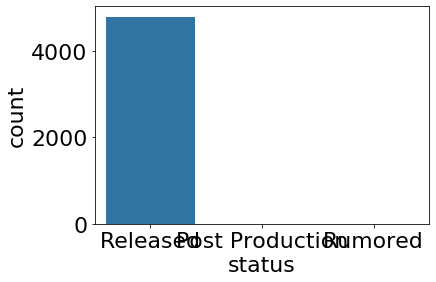

In [106]:
sns.countplot(movies["status"])

Claramente, o status dos filmes a maioria é 'Lançado', então simplesmente removeremos esse campo do conjunto de dados. 

In [107]:
movies.drop(["status"], axis=1, inplace=True)

O idioma original dos filmes no conjunto de dados também pode ser a maioria em inglês e, portanto, não fornecer muitas informações úteis para nós. Vamos dar uma olhada na distribuição dos principais idiomas originais. 

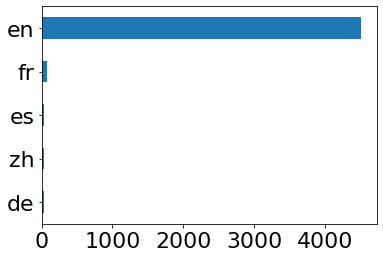

In [108]:
movies["original_language"].value_counts().sort_values().tail().plot.barh()

Como podemos ver, os filmes no conjunto de dados são predominantemente em inglês. Portanto, este campo provavelmente não renderá muitas informações úteis para nós e pode ser descartado. 

In [109]:
movies.drop(["original_language"], axis=1, inplace=True)

Quando se trata da data de lançamento de um filme, provavelmente estaríamos menos interessados no dia exato em que foi lançado e mais curiosos para ver em que ano foi lançado ou em que mês do ano foi lançado. É adicionado dois campos ao conjunto de dados dos filmes, um para o ano de lançamento e um para o mês de lançamento, e o campo release_date é removido. 

In [110]:
movies["release_date"] = pd.to_datetime(movies["release_date"])
movies["release_year"] = movies["release_date"].dt.year
movies["release_month"] = movies["release_date"].dt.month
movies.drop(["release_date"], axis=1, inplace=True)

In [111]:
#Também definiremos o movie_id como o índice do dataframe de nossos filmes 
movies.set_index("movie_id", inplace=True)

In [112]:
#Agora temos um conjunto de dados muito mais limpo 
movies.head()

,budget,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month
movie_id,,,,,,,,,
19995,237000000,150.437577,2787965087,162.0,Avatar,7.2,11800,2009.0,12.0
285,300000000,139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007.0,5.0
206647,245000000,107.376788,880674609,148.0,Spectre,6.3,4466,2015.0,10.0
49026,250000000,112.312950,1084939099,165.0,The Dark Knight Rises,7.6,9106,2012.0,7.0
49529,260000000,43.926995,284139100,132.0,John Carter,6.1,2124,2012.0,3.0


### 1.2.2. Distribuição de dados

#### 1.2.2.1. Distribuição de dados de filmes

C:\Users\Rebeca\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


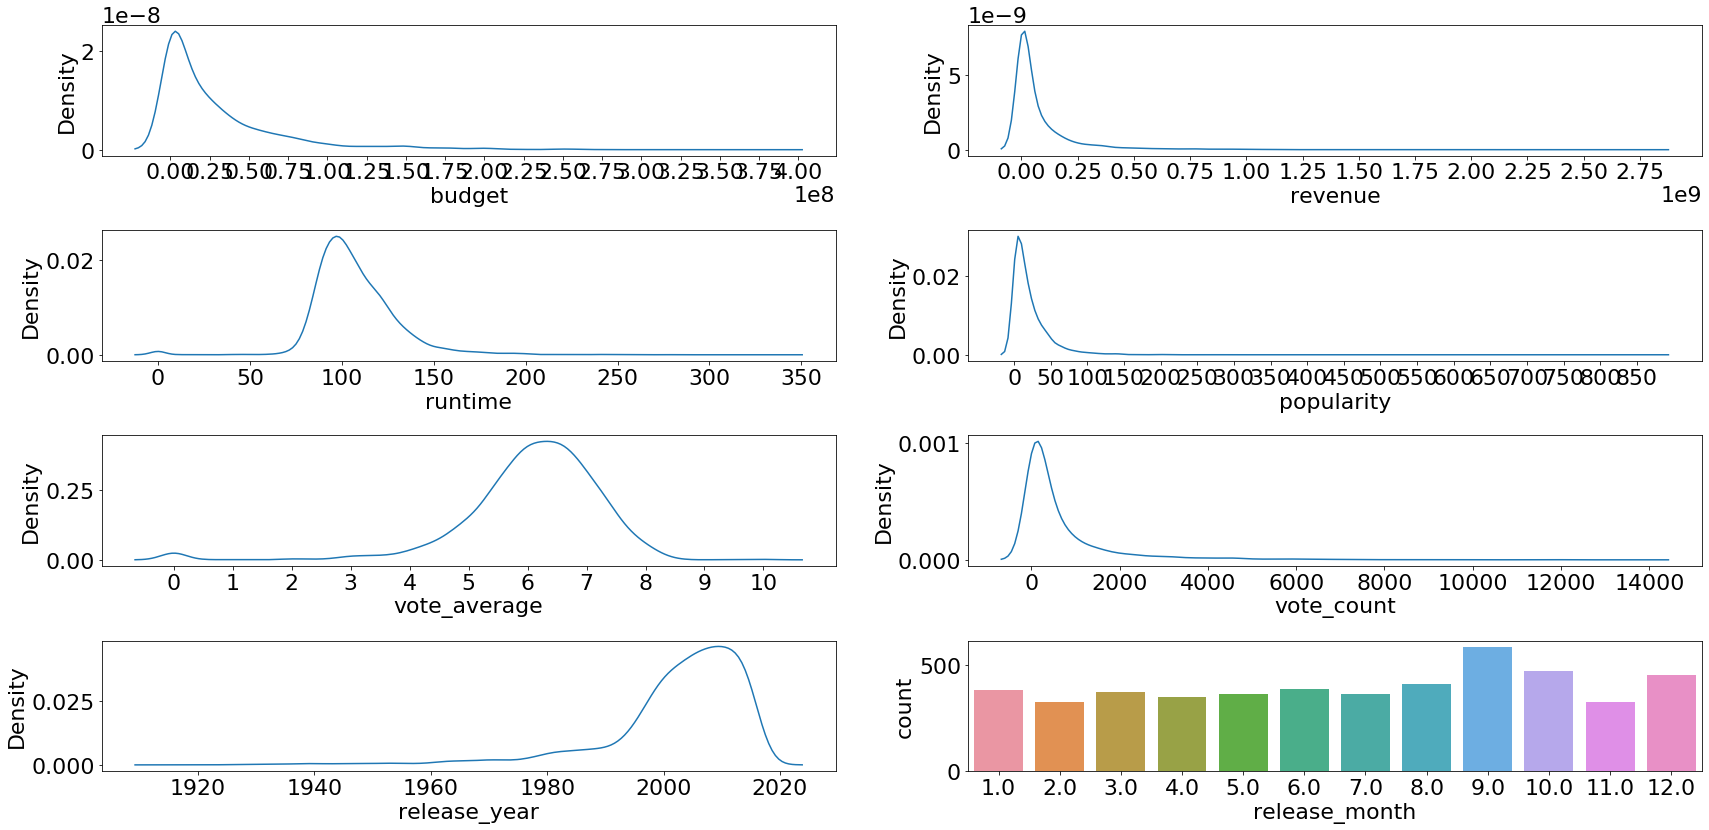

In [113]:
fig, axarr = plt.subplots(4, 2, figsize=(24, 12))
sns.kdeplot(movies["budget"], ax=axarr[0][0])
axarr[0][0].xaxis.set_ticks(np.arange(0, 4.25e8, 0.25e8))
sns.kdeplot(movies["revenue"], ax=axarr[0][1])
axarr[0][1].xaxis.set_ticks(np.arange(0, 3e9, 0.25e9))
sns.kdeplot(movies["runtime"], ax=axarr[1][0])
sns.kdeplot(movies["popularity"], ax=axarr[1][1])
axarr[1][1].xaxis.set_ticks(np.arange(0, 900, 50))
sns.kdeplot(movies["vote_average"], ax=axarr[2][0])
axarr[2][0].xaxis.set_ticks(np.arange(0, 11, 1))
sns.kdeplot(movies["vote_count"], ax=axarr[2][1])
sns.kdeplot(movies["release_year"], ax=axarr[3][0])
sns.countplot(movies["release_month"], ax=axarr[3][1])
fig.tight_layout()

Olhando os resultados acima, podemos ver que a maioria dos filmes no conjunto de dados tem um orçamento de menos de $ 10 milhões (presumivelmente US $) e um rendimento acumulado de menos de $  100 milhões. Também podemos ver que a maioria dos filmes tem uma duração de cerca de 100 minutos ou 1 hora e 45 minutos. Em termos de aclamação e reconhecimento do filme, podemos ver que a maioria dos filmes tem uma pontuação de popularidade em torno de 20, com uma pontuação média de votos geralmente entre 6,0 e 7,0, e uma contagem de votos inferior a 500. Olhando para as datas de lançamento de filmes, podemos ver que ele contém principalmente filmes lançados depois de 1990, distribuídos de maneira bastante uniforme em todos os meses do ano, com a maioria sendo lançada em setembro. 

#### 1.2.2.2. Distribuição de dados de pessoas

C:\Users\Rebeca\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


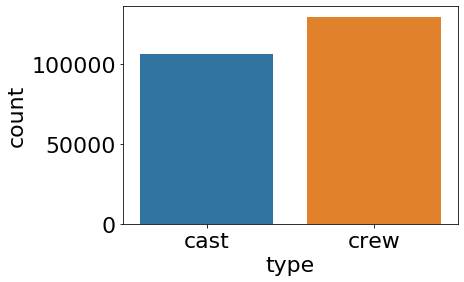

In [114]:
#Vamos primeiro ver a distribuição entre o elenco e a equipe no conjunto de dados
sns.countplot(people["type"])

Como podemos ver, isso indica que há mais membros da equipe do que membros do elenco no conjunto de dados. No entanto, pode haver várias instâncias do mesmo elenco/membro da equipe no dataframe de pessoas, indicando diferentes papéis para diferentes filmes em que trabalharam. Vamos visualizar o número de instâncias únicas de membros do elenco e da equipe. 

C:\Users\Rebeca\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


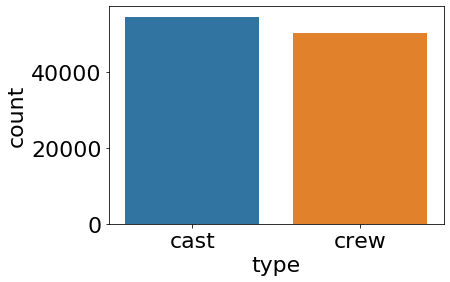

In [115]:
sns.countplot(people.drop_duplicates(["id"])["type"])

Curiosamente, há na verdade mais membros do elenco exclusivos do que membros da equipe no conjunto de dados. Vamos visualizar a distribuição de gênero dessas pessoas únicas. 

C:\Users\Rebeca\miniconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Rebeca\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Rebeca\miniconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rebeca\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

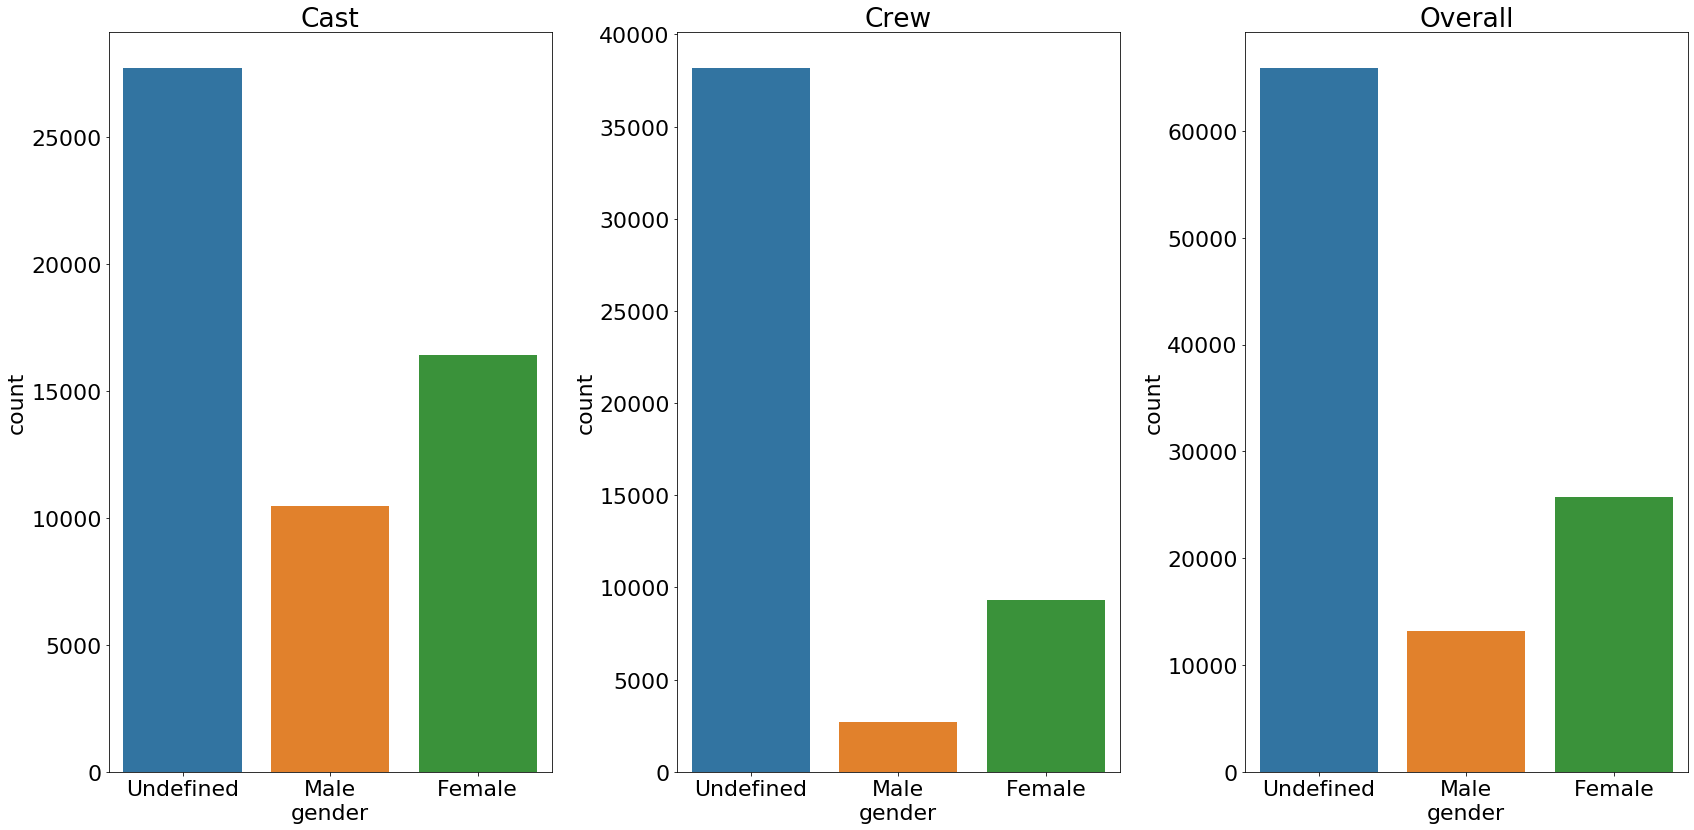

In [116]:
fig, axarr= plt.subplots(1, 3, figsize=(24, 12))
sns.countplot(people.drop_duplicates(["id"])[people["type"] == "cast"]["gender"], ax=axarr[0])
sns.countplot(people.drop_duplicates(["id"])[people["type"] == "crew"]["gender"], ax=axarr[1])
sns.countplot(people.drop_duplicates(["id"])["gender"], ax=axarr[2])
axarr[0].set_title("Cast")
axarr[1].set_title("Crew")
axarr[2].set_title("Overall")
for i in range(3):
    axarr[i].set_xticklabels(["Undefined", "Male", "Female"])
fig.tight_layout()

Infelizmente, devido ao grande número de pessoas com gênero indefinido, não está claro qual é a distribuição de gênero.

Felizmente, podemos ver a distribuição dos departamentos nos quais os membros da equipe trabalham, bem como os dez empregos mais comuns. 

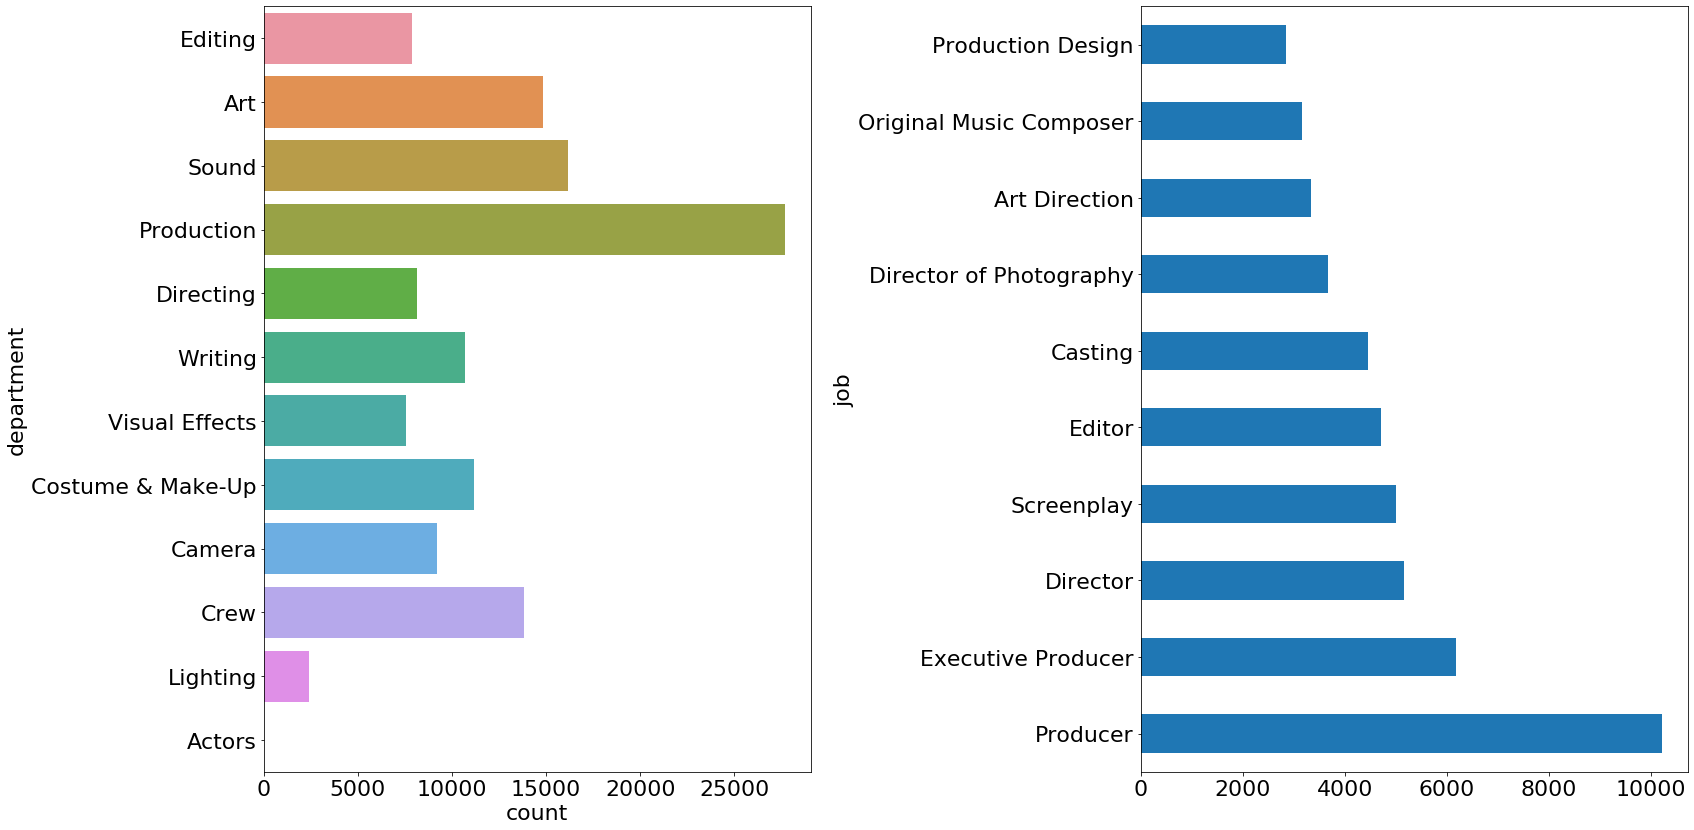

In [117]:
fig, axarr = plt.subplots(1, 2, figsize=(24, 12))
sns.countplot(y=people["department"], ax=axarr[0])
people["job"].value_counts().head(10).plot.barh(ax=axarr[1])
axarr[1].set_ylabel("job")
fig.tight_layout()

Olhando para a visualização acima, podemos ver que a maioria dos membros da equipe está no departamento de produção, com a maioria dos membros da equipe tendo o cargo de "Produtor". Surpreendentemente, há um número muito pequeno de membros designados como pertencentes ao departamento de "Atores". Vamos dar uma olhada nessas pessoas em nosso conjunto de dados de pessoas.

In [118]:
people[people["department"] == "Actors"]

,cast_id,character,credit_id,department,gender,id,job,movie_id,name,order,type
125828,NaN,NaN,52fe42f0c3a36847f802e67d,Actors,0,16740,Stunt Double,1372,Francois Grobbelaar,31,crew
125829,NaN,NaN,52fe42f0c3a36847f802e683,Actors,0,16741,Stunt Double,1372,Mick 'Stuntie' Milligan,32,crew
176103,NaN,NaN,52fe46269251416c9104ad0d,Actors,0,119183,Stunt Double,37056,Giorgio Antonini,23,crew
224775,NaN,NaN,52fe427ac3a36847f8021c71,Actors,0,14445,Stunt Double,813,Leigh Walsh,26,crew


Como podemos ver, esses membros da equipe eram dublês e não eram considerados parte do elenco.

#### 1.2.2.3. Distribuições de dados diversos

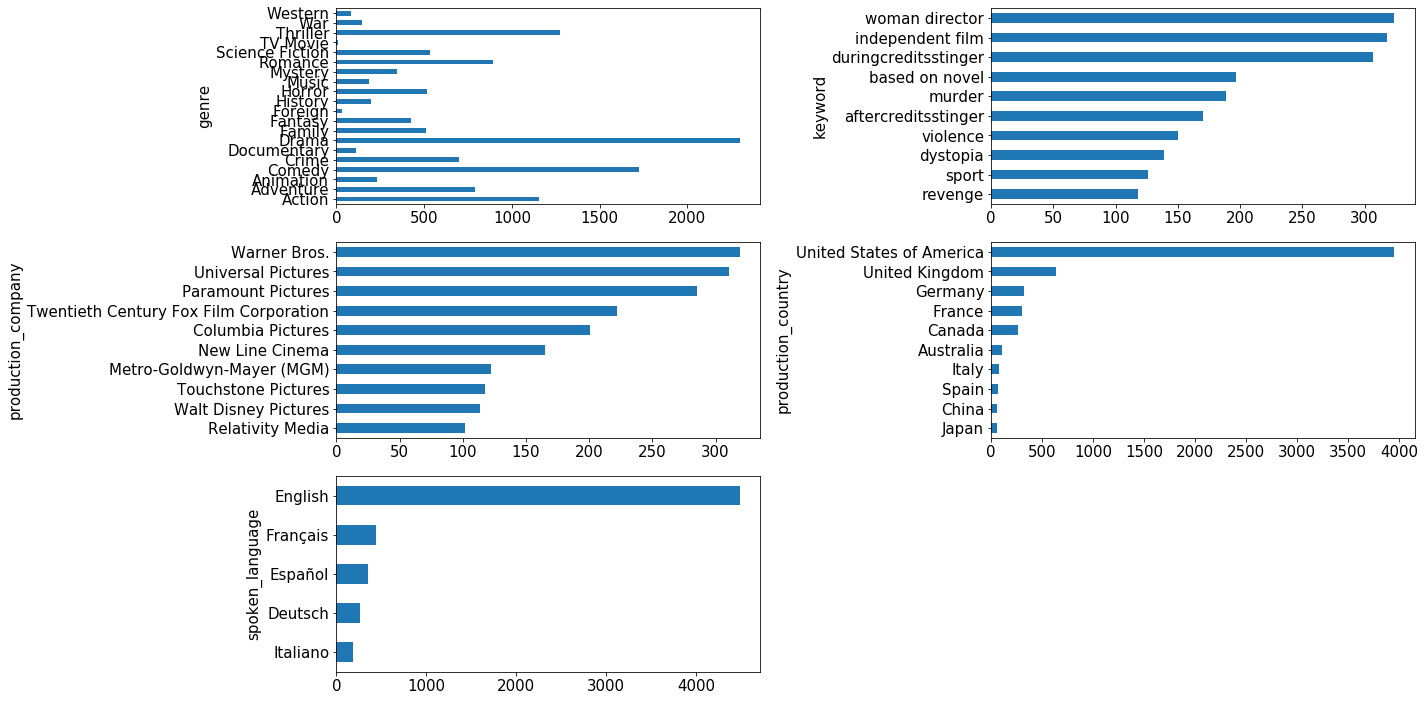

In [119]:
plt.rcParams.update({'font.size': 15})
fig, axarr = plt.subplots(3, 2, figsize=(20, 10))
genres.sum().plot.barh(ax=axarr[0][0])
keywords.sum().sort_values().tail(10).plot.barh(ax=axarr[0][1])
production_companies.sum().sort_values().tail(10).plot.barh(ax=axarr[1][0])
production_countries.sum().sort_values().tail(10).plot.barh(ax=axarr[1][1])
spoken_languages.sum().sort_values().tail().plot.barh(ax=axarr[2][0])
axarr[0][0].set_ylabel("genre")
axarr[0][1].set_ylabel("keyword")
axarr[1][0].set_ylabel("production_company")
axarr[1][1].set_ylabel("production_country")
axarr[2][0].set_ylabel("spoken_language")
axarr[2][1].axis("off")
fig.tight_layout()

O gênero de filme mais prevalente em nosso conjunto de dados é 'Drama', seguido por 'Comédia', com 'Filmes para TV' e 'Estrangeiros' sendo os menos representados. Vendo as palavras-chave mais populares nestes dados, também podemos ver o quão diverso o conteúdo desses filmes, bem como sua produção pode ser. As produtoras mais populares também são aquelas que a maioria das pessoas esperaria, com Warner Bros., Universal Pictures e Paramount Pictures sendo os líderes do grupo. A maioria desses filmes também foi produzida nos Estados Unidos, sendo o inglês a língua falada no filme. 

Blockbusters

Com alguma exploração inicial da distribuição de dados agora concluída, vamos explorar quais fatores têm o maior impacto no sucesso de bilheteria de um filme. Vamos começar observando os dez filmes com maior rendimento. 

Text(0, 0.5, 'film')

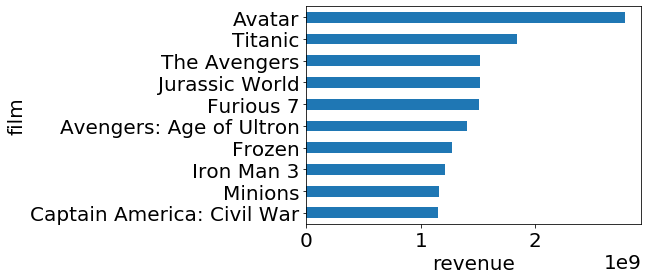

In [120]:
plt.rcParams.update({'font.size': 20})
ax = movies.nlargest(10, "revenue").iloc[::-1].plot.barh(x="title", y="revenue", legend=False)
ax.set_xlabel("revenue")
ax.set_ylabel("film")

Como podemos ver, todos esses filmes geraram rendimento superior a US $ 1 bilhão, com 'Avatar' sendo claramente o filme de maior bilheteria.

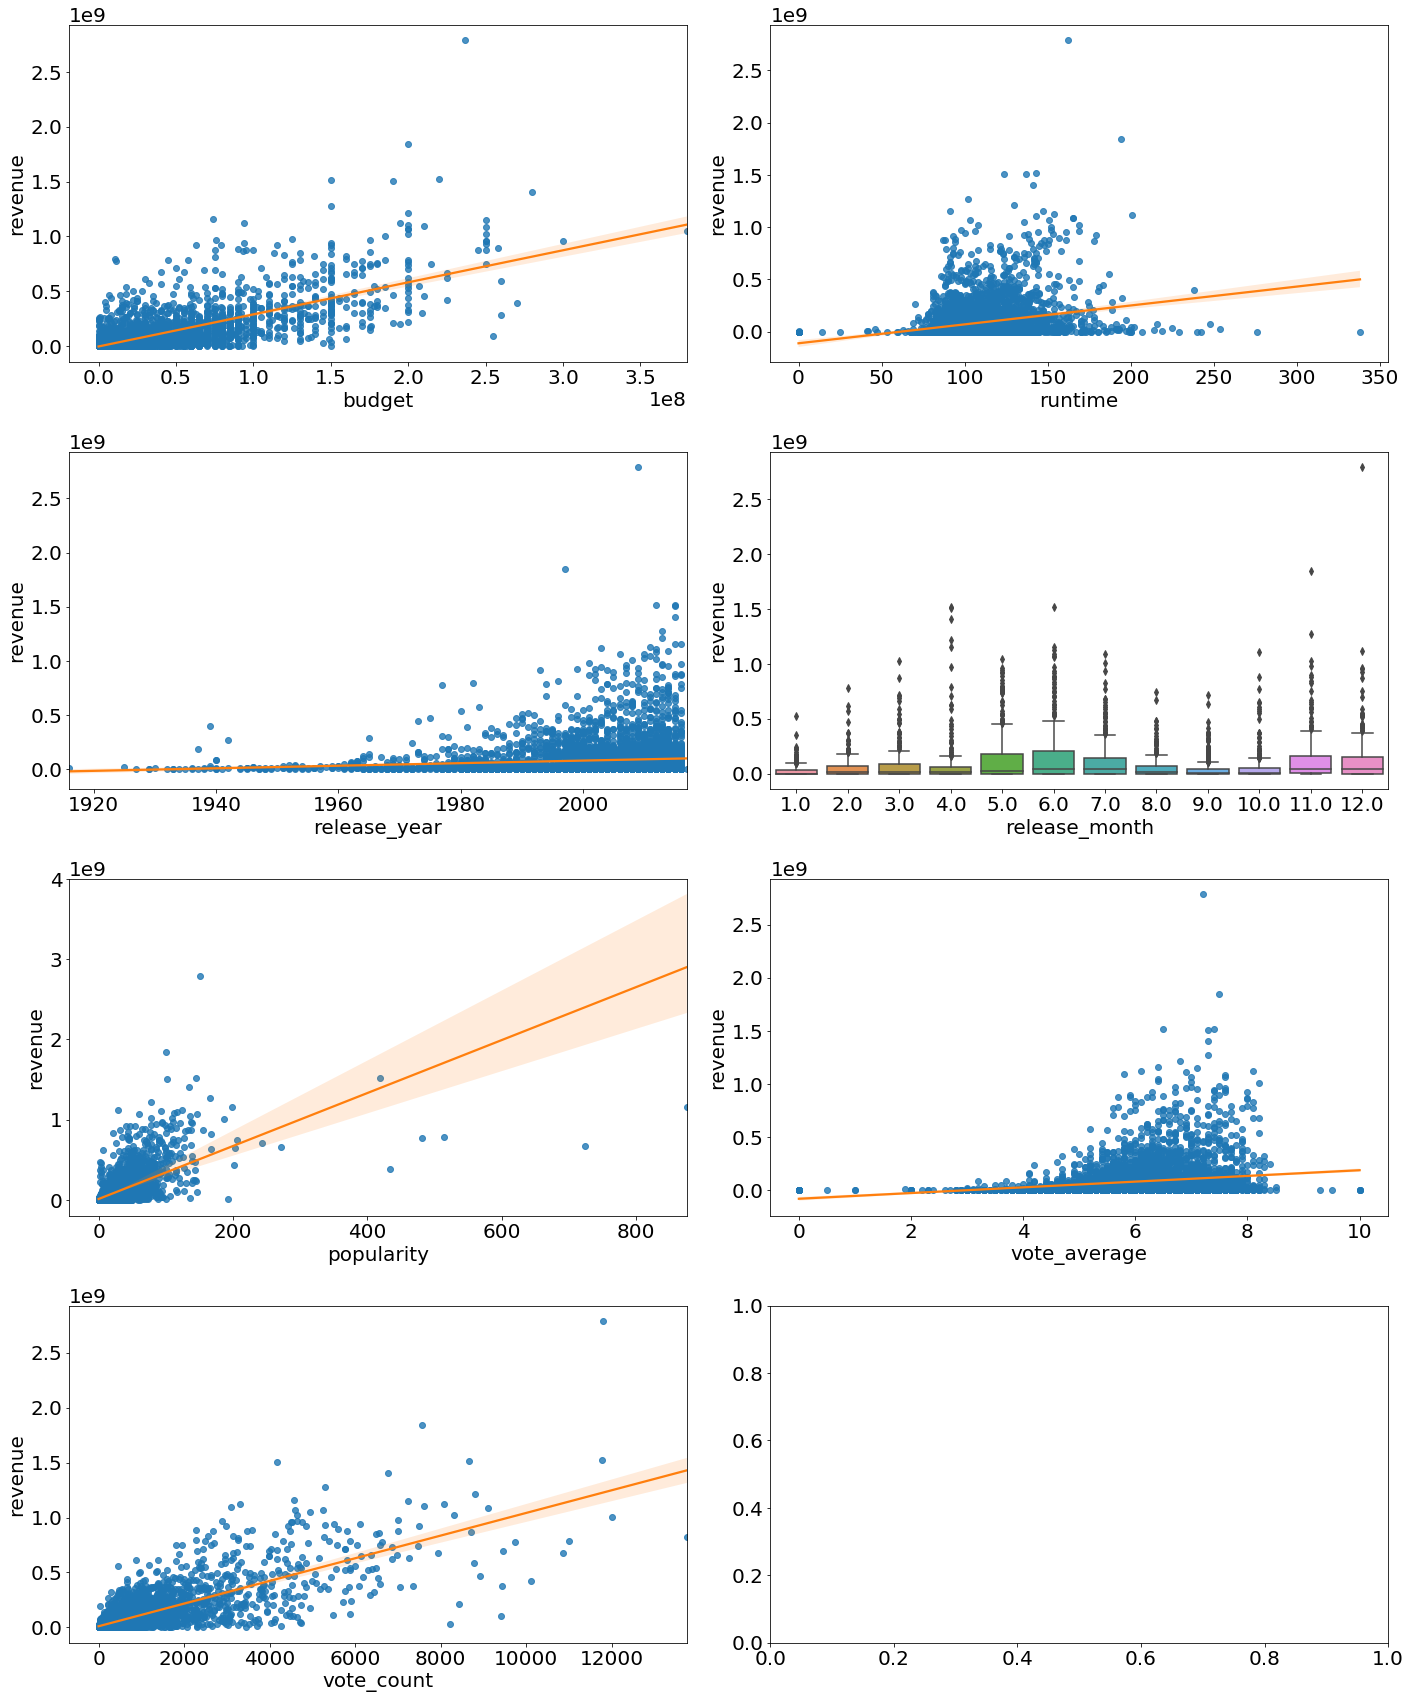

In [121]:
# Vamos agora começar a ver a relação que diferentes fatores podem ter com o sucesso de bilheteria 
fig, axarr = plt.subplots(4, 2, figsize=(20, 24))
p_color = dict(color="C0")
l_color = dict(color="C1")
sns.regplot(x="budget", y="revenue", data=movies, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[0][0])
sns.regplot(x="runtime", y="revenue", data=movies, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[0][1])
sns.regplot(x="release_year", y="revenue", data=movies, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[1][0])
sns.boxplot(x="release_month", y="revenue", data=movies, ax=axarr[1][1])
sns.regplot(x="popularity", y="revenue", data=movies, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[2][0])
sns.regplot(x="vote_average", y="revenue", data=movies, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[2][1])
sns.regplot(x="vote_count", y="revenue", data=movies, fit_reg=True, scatter_kws=p_color, line_kws=l_color, ax=axarr[3][0])
fig.tight_layout()

Como podemos ver, há uma correlação pronunciada entre o orçamento do filme e o rendimento, com filmes com custos de produção mais altos geralmente gerando mais receita. Há também uma correlação positiva interessante, embora menos pronunciada, entre o tempo de execução do filme e o rendimento, com filmes mais longos geralmente acumulando rendimento mais alto. O ano em que um filme foi lançado também não parece ter muito impacto no rendimento que gera, portanto, não podemos necessariamente esperar que os filmes mais recentes gerem mais rendimento do que os filmes mais antigos. Vendo os boxplots comparando o mês de lançamento do filme com o rendimento, podemos ver que a maioria dos filmes de maior bilheteria parecem ter sido lançados nos meses de maio, junho, novembro e dezembro, com os filmes lançados em janeiro, setembro e outubro parecendo ser menos bem-sucedido financeiramente. Quanto mais rendimento um filme acumula, sem surpresa, também parece estar correlacionado com sua pontuação de popularidade e o número de votos que recebe. Filmes de alta bilheteria também parecem obter classificações de votos mais altas, embora essa correlação positiva seja muito menos pronunciada do que entre rendimento e popularidade e contagem de votos. 